## Extract out relevant columns from dataset
- Recipe_id
- Nutritional Components

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.mixture import GaussianMixture
import random

In [2]:
raw_recipes = pd.read_csv("./Dataset/RAW_recipes.csv")
full_dataset = pd.read_csv("./Dataset/train_dataset_all.csv")
full_dataset

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,9014,vegetables,cheesy potato skillet stuff,5,40,357.8,33.0,6.0,22.0,30.0,...,1.791759,3.091042,3.401197,3.610918,2.079442,11297,2001-06-18,What a great quick & easy meal especially for ...,4,this recipe came about when a friend of mine r...
1,9492,meat,chicken honey glazed,7,100,484.9,11.0,189.0,20.0,110.0,...,5.241747,2.995732,4.700480,1.791759,2.772589,11297,2001-06-26,So easy and tasty. To make the clean-up even...,4,serve with a green salad and a your favorite r...
2,2731,meat,jaegerschnitzel,17,35,382.2,28.0,16.0,17.0,61.0,...,2.772589,2.833213,4.110874,3.526361,1.609438,11297,2001-07-02,The man of the house really loved the sauce wi...,4,(breaded veal cutlet with mushroom sauce)
3,10104,pasta,broccoli pork,12,30,150.3,8.0,19.0,26.0,30.0,...,2.944439,3.258097,3.401197,1.791759,1.098612,11297,2001-07-16,Really great. Sometimes I also add some thinly...,4,"this is my favorite marinade for pork, orienta..."
4,5478,meat,easy garlic chicken,5,30,221.3,9.0,53.0,5.0,50.0,...,3.970292,1.609438,3.912023,1.609438,1.386294,11297,2001-07-17,Easy and tasty. Even easier clean-up by lini...,4,"a quick, easy chicken recipe for days when you..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121663,313101,salads,asian beef salad,7,20,312.1,22.0,14.0,7.0,70.0,...,2.639057,1.945910,4.248495,3.218876,1.098612,114027,2009-10-02,This was a really nice salad! I loved how refr...,5,"this is a delicious, low-calorie salad adapted..."
121664,258429,meat,corned beef corned silverside for the crock pot,5,490,652.8,73.0,20.0,118.0,91.0,...,2.995732,4.770685,4.510860,4.369448,0.693147,58439,2009-10-02,"Beautiful delicious, TERRIFICALLY moist, TRUE!...",5,beautiful slow cooked corned meat. put it on i...
121665,83475,meat,three cup chicken,10,60,668.4,60.0,43.0,62.0,104.0,...,3.761200,4.127134,4.644391,3.761200,1.791759,185926,2009-10-02,I love this chicken and I don't even like chic...,5,this is a traditional taiwanese dish that we a...
121666,388912,vegetables,roasted mushrooms baked with a bourbon cream s...,16,55,255.9,24.0,14.0,22.0,10.0,...,2.639057,3.091042,2.302585,3.526361,1.609438,690623,2009-10-02,We really loved these mushrooms! I would howe...,5,this is a favorite of mine. roasted rich cremi...


### Beverages - sugar

In [3]:
beverages = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
beverages = beverages[beverages['category'] == 'beverages']
beverages.drop_duplicates(inplace=True)
beverages

,category,log sugar,recipe_id,sugar (PDV)
136,beverages,4.882802,13267,132.0
154,beverages,3.784190,13366,44.0
162,beverages,3.951244,15292,52.0
248,beverages,5.298317,16632,200.0
269,beverages,1.098612,15438,3.0
...,...,...,...,...
121491,beverages,3.465736,340328,32.0
121495,beverages,0.000000,215395,0.0
121558,beverages,0.000000,391956,0.0
121617,beverages,3.970292,131122,53.0


<AxesSubplot:xlabel='recipe_id', ylabel='log sugar'>

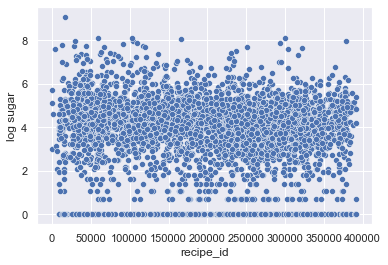

In [4]:
# Using scatter plot of one category to understand the spread of the data points, and decide which clustering method to use

sns.scatterplot(data=beverages, x='recipe_id', y='log sugar')

In [5]:
def gaussian_model(x, k):
    gm = GaussianMixture(n_components=k, n_init=10, random_state=42, init_params='kmeans')
    gm.fit(x)
    return (gm.bic(x), gm.aic(x))

In [38]:
x = beverages.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  9276.056379993572
aic Score:  9244.201326587381

cluster number:  3
bic score:  8979.64638621138
aic Score:  8928.678300761474

cluster number:  4
bic score:  9009.35196461066
aic Score:  8939.27084711704

cluster number:  5
bic score:  9034.210143135813
aic Score:  8945.01599359848

cluster number:  6
bic score:  9046.857581189484
aic Score:  8938.550399608435

cluster number:  7
bic score:  9048.802678012476
aic Score:  8921.382464387714

cluster number:  8
bic score:  9064.653257581635
aic Score:  8918.120011913157

cluster number:  9
bic score:  9051.870868470054
aic Score:  8886.224590757862

cluster number:  10
bic score:  9059.762897399492
aic Score:  8875.003587643587

cluster number:  11
bic score:  9089.02402060133
aic Score:  8885.151678801709

cluster number:  12
bic score:  9111.874710402017
aic Score:  8888.889336558681

cluster number:  13
bic score:  8574.385809570169
aic Score:  8332.28740368312

cluster number:  14
bic score:  8616.39681

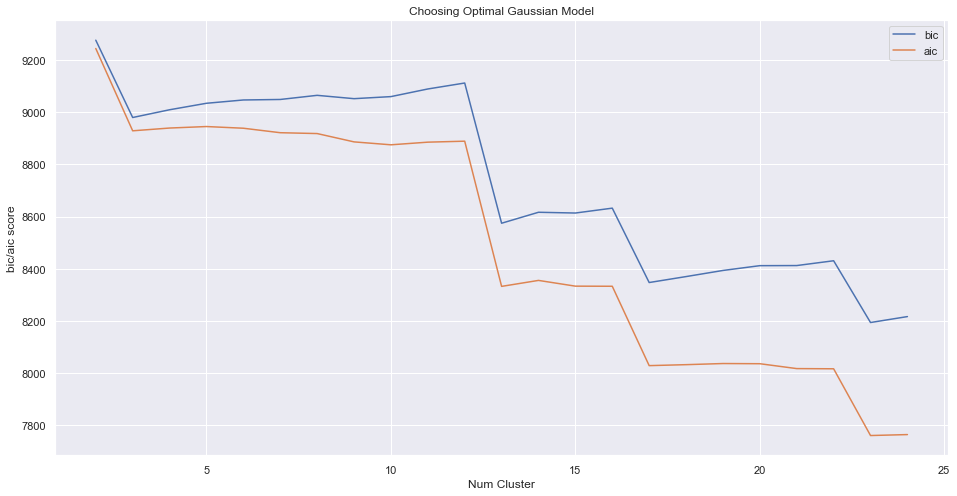

In [39]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [40]:
# selecting the features
x = beverages.iloc[:,1]
x = pd.DataFrame(x)
       
model = GaussianMixture(n_components=24, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
beverages['cluster'] = labels

beverages.groupby('cluster').median()

,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,4.158883,209807.0,64.0
1,0.000000,228681.5,0.0
2,6.385194,137575.0,593.0
3,2.639057,230337.0,14.0
4,5.278115,181798.5,196.0
5,3.555348,217533.0,35.0
6,1.791759,213836.0,6.0
7,4.804021,215584.0,122.0
8,7.802209,104614.0,2446.0


In [41]:
g1_beverage = [1, 3, 6, 10, 12, 15, 16, 17, 21, 22] # 33 and below

g2_beverage = [0, 5, 11, 13, 19, 20] # 34 - 99

g3_beverage = [2, 4, 7, 8, 9, 14, 18, 23] # 100 and above

In [42]:
beverages['groups'] = 0
for i, r in beverages.iterrows():
    if r['cluster'] in g1_beverage:
        beverages.at[i,'groups'] = 1
    elif r['cluster'] in g2_beverage:
        beverages.at[i,'groups'] = 2
    elif r['cluster'] in g3_beverage:
        beverages.at[i,'groups'] = 3

In [43]:
beverages.head()

,category,log sugar,recipe_id,sugar (PDV),cluster,groups
136,beverages,4.882802,13267,132.0,7,3
154,beverages,3.784190,13366,44.0,19,2
162,beverages,3.951244,15292,52.0,13,2
248,beverages,5.298317,16632,200.0,4,3
269,beverages,1.098612,15438,3.0,16,1


## Desserts - sugar

In [44]:
desserts = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
desserts = desserts[desserts['category'] == 'desserts']
desserts.drop_duplicates(inplace=True)

In [45]:
# selecting the features
x = desserts.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  40674.29069088315
aic Score:  40637.03800249387

cluster number:  3
bic score:  40507.92407009452
aic Score:  40448.319768671674

cluster number:  4
bic score:  40230.94087891336
aic Score:  40148.98496445694

cluster number:  5
bic score:  40256.57505671505
aic Score:  40152.267529225064

cluster number:  6
bic score:  37679.272803144464
aic Score:  37552.61366262091

cluster number:  7
bic score:  37673.26767578238
aic Score:  37524.25692222526

cluster number:  8
bic score:  37698.883139524405
aic Score:  37527.52077293371

cluster number:  9
bic score:  37725.28110749712
aic Score:  37531.567127872855

cluster number:  10
bic score:  37758.163750235864
aic Score:  37542.09815757803

cluster number:  11
bic score:  37773.45479976348
aic Score:  37535.037594072084

cluster number:  12
bic score:  37799.307813370244
aic Score:  37538.53899464528

cluster number:  13
bic score:  37824.558835124655
aic Score:  37541.43840336612

cluster number:  14
bic sco

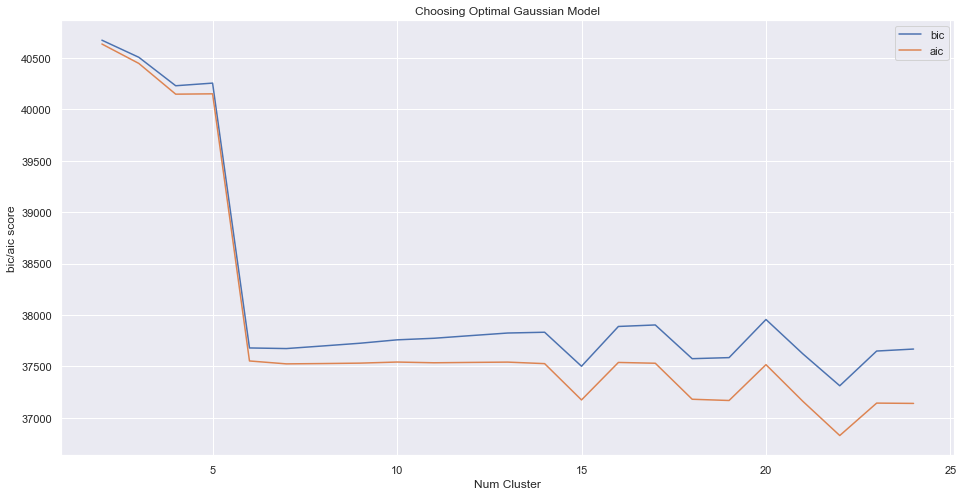

In [46]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [47]:
# selecting the features
x = desserts.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
desserts['cluster'] = labels

desserts.groupby('cluster').median()

,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,6.313548,124520.0,552.0
1,4.060443,152148.0,58.0
2,1.098612,133579.0,3.0
3,5.111988,134216.0,166.0
4,2.772589,140706.0,16.0
5,7.664347,80949.0,2131.0
6,0.000000,158726.0,0.0
7,3.526361,139819.0,34.0
8,4.663439,146543.5,106.0


In [48]:
g1_dessert = [2, 4, 6, 14, 15, 16, 21] # 33 and below

g2_dessert = [1, 7, 12, 17, 22] # 34 - 99

g3_dessert = [0, 3, 5, 8, 9, 10, 11, 13, 18, 19, 20] # 100 and above

In [49]:
desserts['groups'] = 0
for i, r in desserts.iterrows():
    if r['cluster'] in g1_dessert:
        desserts.at[i,'groups'] = 1
    elif r['cluster'] in g2_dessert:
        desserts.at[i,'groups'] = 2
    elif r['cluster'] in g3_dessert:
        desserts.at[i,'groups'] = 3

### Vegetables - sodium

In [50]:
vegetables = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
vegetables = vegetables[vegetables['category'] == 'vegetables']
vegetables.drop_duplicates(inplace=True)

In [51]:
x = vegetables.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  24737.621024448028
aic Score:  24699.8058373753

cluster number:  3
bic score:  24782.617077281113
aic Score:  24722.112777964747

cluster number:  4
bic score:  24456.747452192736
aic Score:  24373.554040632735

cluster number:  5
bic score:  24382.24443241653
aic Score:  24276.36190861289

cluster number:  6
bic score:  24254.21790811743
aic Score:  24125.646272070153

cluster number:  7
bic score:  24258.30712642906
aic Score:  24107.046378138144

cluster number:  8
bic score:  19000.70320906803
aic Score:  18826.75334853348

cluster number:  9
bic score:  18789.931109644564
aic Score:  18593.292136866374

cluster number:  10
bic score:  13659.078049704452
aic Score:  13439.749964682627

cluster number:  11
bic score:  13618.463628464093
aic Score:  13376.44643119863

cluster number:  12
bic score:  13556.027151953373
aic Score:  13291.320842444273

cluster number:  13
bic score:  8870.361854515491
aic Score:  8582.966432762754

cluster number:  14
bic

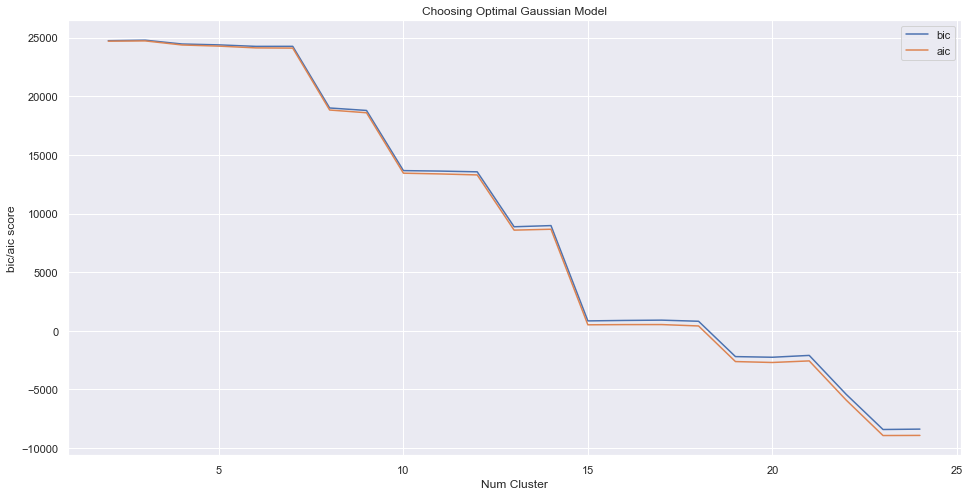

In [52]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [53]:
x = vegetables.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=24, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
vegetables['cluster'] = labels

vegetables.groupby('cluster').median()

,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,3.044522,141082.0,21.0
1,0.000000,148485.0,0.0
2,1.609438,135345.0,5.0
3,4.127134,143100.0,62.0
4,2.302585,153170.0,10.0
5,4.969813,115154.0,144.0
6,1.098612,142953.0,3.0
7,7.778388,87310.0,2388.5
8,3.433987,149428.0,31.0


In [54]:
g1_veg = [0,1,2,4,6,8,9,10,11,15,16,17,18,19,22,23] # 33 and below

g2_veg = [3,12,14,21] # 34 - 99

g3_veg = [5,7,13,20] # 100 and above

In [55]:
vegetables['groups'] = 0
for i, r in vegetables.iterrows():
    if r['cluster'] in g1_veg:
        vegetables.at[i,'groups'] = 1
    elif r['cluster'] in g2_veg:
        vegetables.at[i,'groups'] = 2
    elif r['cluster'] in g3_veg:
        vegetables.at[i,'groups'] = 3

### Pasta - fat and sodium

In [56]:
pasta = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
pasta = pasta[pasta['category'] == 'pasta']
pasta.drop_duplicates(inplace=True)

In [57]:
x = pd.DataFrame(pasta.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  53126.37639201909
aic Score:  52994.154356239495

cluster number:  3
bic score:  52364.484610820895
aic Score:  52162.672029894136

cluster number:  4
bic score:  40130.949975785625
aic Score:  39859.54684971171

cluster number:  5
bic score:  41856.67238616295
aic Score:  41515.67871494188

cluster number:  6
bic score:  41417.893449005656
aic Score:  41007.30923263743

cluster number:  7
bic score:  39333.427504583226
aic Score:  38853.252743067846

cluster number:  8
bic score:  39971.388500263325
aic Score:  39421.62319360078

cluster number:  9
bic score:  39866.94704938332
aic Score:  39247.59119757362

cluster number:  10
bic score:  37873.075825273416
aic Score:  37184.12942831656

cluster number:  11
bic score:  37784.46923806582
aic Score:  37025.932295961815

cluster number:  12
bic score:  38111.60136248917
aic Score:  37283.47387523801

cluster number:  13
bic score:  37832.06799511577
aic Score:  36934.349962717446

cluster number:  14
bic s

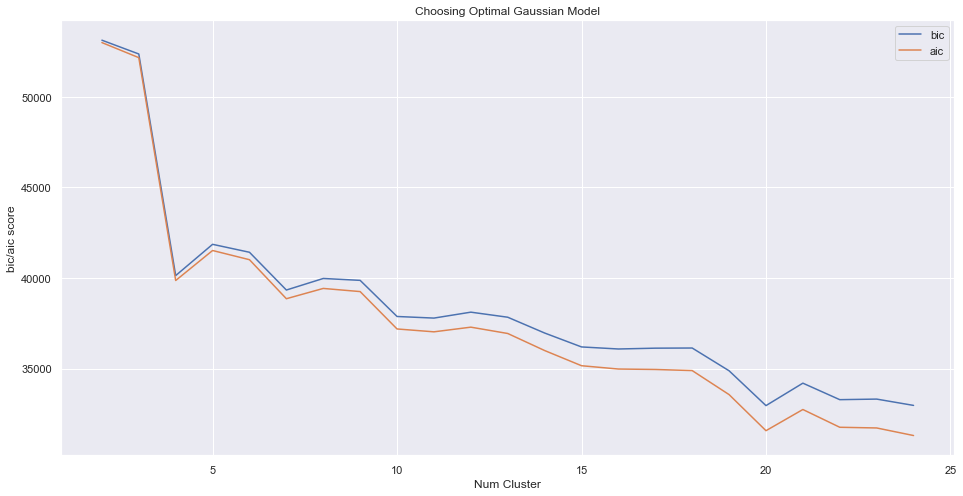

In [58]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [59]:
x = pd.DataFrame(pasta.iloc[:,1:4])

model = GaussianMixture(n_components=21, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
pasta['cluster'] = labels

pasta.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.740319,3.737670,2.484907,149852.0,15.5,12.0,42.0
1,2.484907,0.693147,2.302585,157879.5,12.0,10.0,2.0
2,4.060443,4.248495,4.430817,149000.0,58.0,84.0,70.0
3,3.367296,2.484907,3.828641,136471.5,29.0,46.0,12.0
4,1.945910,1.609438,1.868835,136814.0,7.0,6.5,5.0
5,3.663562,2.995732,3.555348,151765.0,39.0,35.0,20.0
6,2.673554,1.098612,2.484907,139228.0,14.5,12.0,3.0
7,0.693147,2.484907,0.000000,155604.0,2.0,1.0,12.0
8,2.197225,2.397895,2.197225,149182.0,9.0,9.0,11.0


In [60]:
g1_pasta = [1, 4, 6, 7, 8, 9, 12, 14, 16, 17, 18, 19, 20] # all 33 and below

g2_pasta = [0, 2, 3, 5, 10, 13, 15] # all components more than 33 but less than 100 

g3_pasta = [11] # at least 1 component has 100 or more

In [61]:
pasta['groups'] = 0
for i, r in pasta.iterrows():
    if r['cluster'] in g1_pasta:
        pasta.at[i,'groups'] = 1
    elif r['cluster'] in g2_pasta:
        pasta.at[i,'groups'] = 2
    elif r['cluster'] in g3_pasta:
        pasta.at[i,'groups'] = 3

### Seafood - fat and sodium

In [62]:
seafood = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
seafood = seafood[seafood['category'] == 'seafood']
seafood.drop_duplicates(inplace=True)

In [63]:
x = pd.DataFrame(seafood.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  22006.50920387733
aic Score:  21891.491389663774

cluster number:  3
bic score:  21741.07553365298
aic Score:  21565.522027748077

cluster number:  4
bic score:  19369.233673590537
aic Score:  19133.14447599429

cluster number:  5
bic score:  19175.29091599843
aic Score:  18878.66602671084

cluster number:  6
bic score:  19132.689188512108
aic Score:  18775.52860753317

cluster number:  7
bic score:  19201.003718698215
aic Score:  18783.30744602793

cluster number:  8
bic score:  19202.35982133761
aic Score:  18724.12785697598

cluster number:  9
bic score:  19273.066128915976
aic Score:  18734.298472863004

cluster number:  10
bic score:  19319.22814396559
aic Score:  18719.92479622127

cluster number:  11
bic score:  18440.59294636698
aic Score:  17780.753906931317

cluster number:  12
bic score:  18452.36629684689
aic Score:  17731.99156571988

cluster number:  13
bic score:  18569.040388818154
aic Score:  17788.129965999797

cluster number:  14
bic sc

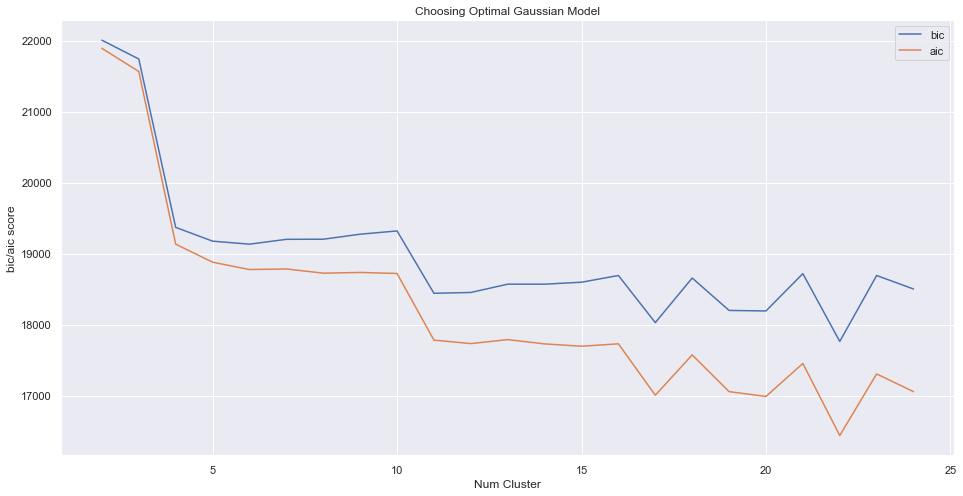

In [64]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [65]:
x = pd.DataFrame(seafood.iloc[:,1:4])

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
seafood['cluster'] = labels

seafood.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,4.085941,4.094345,4.412780,140564.0,59.5,82.5,60.0
1,1.609438,2.708050,1.098612,139964.0,5.0,3.0,15.0
2,3.295837,2.673554,2.564949,167455.5,27.0,13.0,14.5
3,2.079442,3.526361,1.386294,183102.0,8.0,4.0,34.0
4,1.386294,2.197225,0.693147,150230.0,4.0,2.0,9.0
5,2.833213,3.713572,2.197225,156982.5,17.0,9.0,41.0
6,2.639057,2.484907,2.564949,155617.0,14.0,13.0,12.0
7,3.610918,3.332205,4.255588,128561.5,37.0,70.5,28.0
8,2.970086,3.218876,2.944439,160716.5,19.5,19.0,25.0


In [66]:
g1_seafood = [1, 2, 4, 6, 8, 10, 12, 13, 14, 15, 18, 21, 22] #healthy

g2_seafood = [0, 3, 5, 7, 11, 16, 17, 19, 20] # moderately unhealthy

g3_seafood = [9] # unhealthy

In [67]:
seafood['groups'] = 0
for i, r in seafood.iterrows():
    if r['cluster'] in g1_seafood:
        seafood.at[i,'groups'] = 1
    elif r['cluster'] in g2_seafood:
        seafood.at[i,'groups'] = 2
    elif r['cluster'] in g3_seafood:
        seafood.at[i,'groups'] = 3

### Meat - fat and sodium

In [68]:
meat = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
meat = meat[meat['category'] == 'meat']
meat.drop_duplicates(inplace=True)

In [69]:
x = pd.DataFrame(meat.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  76533.86331116523
aic Score:  76392.87804634497

cluster number:  3
bic score:  75948.91957506027
aic Score:  75733.73153928197

cluster number:  4
bic score:  75727.6534928298
aic Score:  75438.26268609348

cluster number:  5
bic score:  75546.20606319679
aic Score:  75182.61248550244

cluster number:  6
bic score:  70627.55391945226
aic Score:  70189.75757079988

cluster number:  7
bic score:  70713.56971962916
aic Score:  70201.57060001875

cluster number:  8
bic score:  70745.97792415148
aic Score:  70159.77603358302

cluster number:  9
bic score:  70499.52516041235
aic Score:  69839.12049888587

cluster number:  10
bic score:  69230.9113987521
aic Score:  68496.30396626759

cluster number:  11
bic score:  68950.87224671032
aic Score:  68142.06204326778

cluster number:  12
bic score:  68991.16229117665
aic Score:  68108.14931677608

cluster number:  13
bic score:  69105.46152072983
aic Score:  68148.24577537124

cluster number:  14
bic score:  69152.

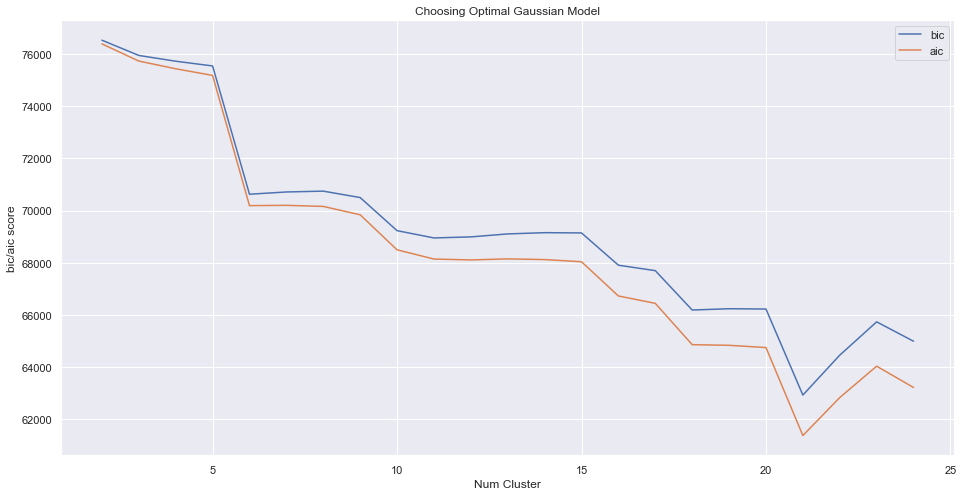

In [70]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [71]:
x = pd.DataFrame(meat.iloc[:,1:4])

model = GaussianMixture(n_components=22, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
meat['cluster'] = labels

meat.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.850148,1.945910,3.951244,151228.5,47.0,52.0,7.0
1,3.218876,3.401197,3.433987,149627.5,25.0,31.0,30.0
2,0.000000,2.564949,0.000000,135509.5,0.0,0.0,13.0
3,4.219508,3.871201,4.521789,149603.0,68.0,92.0,48.0
4,1.945910,2.708050,1.609438,165998.5,7.0,5.0,15.0
5,3.044522,1.386294,3.135494,141686.0,21.0,23.0,4.0
6,3.688879,2.833213,3.761200,142816.0,40.0,43.0,17.0
7,2.397895,3.526361,1.945910,152974.0,11.0,7.0,34.0
8,2.397895,2.302585,2.302585,158634.0,11.0,10.0,10.0


In [72]:
g1_meat= [1, 2, 4, 5, 8, 10, 12, 15, 16, 19, 20] # healthy

g2_meat = [0, 3, 6, 7, 13, 21] # moderately unhealthy

g3_meat = [9, 11, 14, 17, 18] # unhealthy

In [73]:
meat['groups'] = 0
for i, r in meat.iterrows():
    if r['cluster'] in g1_meat:
        meat.at[i,'groups'] = 1
    elif r['cluster'] in g2_meat:
        meat.at[i,'groups'] = 2
    elif r['cluster'] in g3_meat:
        meat.at[i,'groups'] = 3

### Soup - sodium

In [74]:
soup = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
soup = soup[soup['category'] == 'soup']
soup.drop_duplicates(inplace=True)

In [75]:
x = soup.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  8329.339446792203
aic Score:  8299.511718926553

cluster number:  3
bic score:  8326.783332511897
aic Score:  8279.058967926858

cluster number:  4
bic score:  6551.797143162998
aic Score:  6486.1761418585675

cluster number:  5
bic score:  6571.339971062143
aic Score:  6487.822333038323

cluster number:  6
bic score:  6581.524721507638
aic Score:  6480.110446764428

cluster number:  7
bic score:  6548.252445755279
aic Score:  6428.9415342926795

cluster number:  8
bic score:  5884.793523436032
aic Score:  5747.585975254042

cluster number:  9
bic score:  5872.924541488738
aic Score:  5717.820356587358

cluster number:  10
bic score:  5896.289454558239
aic Score:  5723.28863293747

cluster number:  11
bic score:  5904.128628509519
aic Score:  5713.23117016936

cluster number:  12
bic score:  5468.616995346771
aic Score:  5259.822900287221

cluster number:  13
bic score:  5472.035003635691
aic Score:  5245.344271856751

cluster number:  14
bic score:  5053

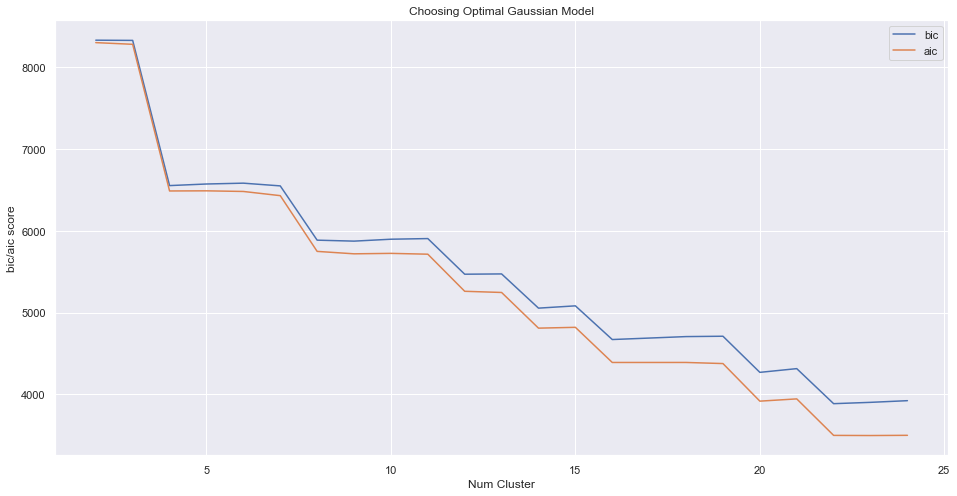

In [76]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [77]:
x = soup.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
soup['cluster'] = labels

soup.groupby('cluster').median()

,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,3.332205,151341.0,28.0
1,0.693147,180574.5,2.0
2,4.158883,142140.0,64.0
3,2.564949,169324.0,13.0
4,1.945910,188780.0,7.0
5,0.000000,164350.0,1.0
6,5.049835,106819.0,156.0
7,3.828641,172897.0,46.0
8,2.833213,163108.0,17.0


In [78]:
g1_soup = [0, 1, 3, 4, 5, 8, 9, 10, 13, 15, 18, 20, 21, 22] # healthy

g2_soup = [2, 7, 14, 16, 19] # moderately unhealthy

g3_soup = [6, 11, 12, 17] # unhealthy

In [79]:
soup['groups'] = 0
for i, r in soup.iterrows():
    if r['cluster'] in g1_soup:
        soup.at[i,'groups'] = 1
    elif r['cluster'] in g2_soup:
        soup.at[i,'groups'] = 2
    elif r['cluster'] in g3_soup:
        soup.at[i,'groups'] = 3

### Burgers - fat and sodium

In [80]:
burgers = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
burgers = burgers[burgers['category'] == 'burgers']
burgers.drop_duplicates(inplace=True)

In [81]:
x = pd.DataFrame(burgers.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  371.0018469801058
aic Score:  327.4831175982864

cluster number:  3
bic score:  370.5954586155469
aic Score:  304.1721348222435

cluster number:  4
bic score:  363.9785326705415
aic Score:  274.65061446575424

cluster number:  5
bic score:  348.3708944397745
aic Score:  236.13838182350332

cluster number:  6
bic score:  362.00857070217444
aic Score:  226.87146367441937

cluster number:  7
bic score:  339.7575124777867
aic Score:  181.7158110385477

cluster number:  8
bic score:  368.54621768610826
aic Score:  187.5999218353854

cluster number:  9
bic score:  429.74870071152316
aic Score:  225.89781044931632

cluster number:  10
bic score:  442.77389748065326
aic Score:  216.01841280696254

cluster number:  11
bic score:  434.1711563318492
aic Score:  184.51107724667457

cluster number:  12
bic score:  448.539955364582
aic Score:  175.97528186792346

cluster number:  13
bic score:  447.85092171734624
aic Score:  152.38165380920378

cluster number:  14
bic 

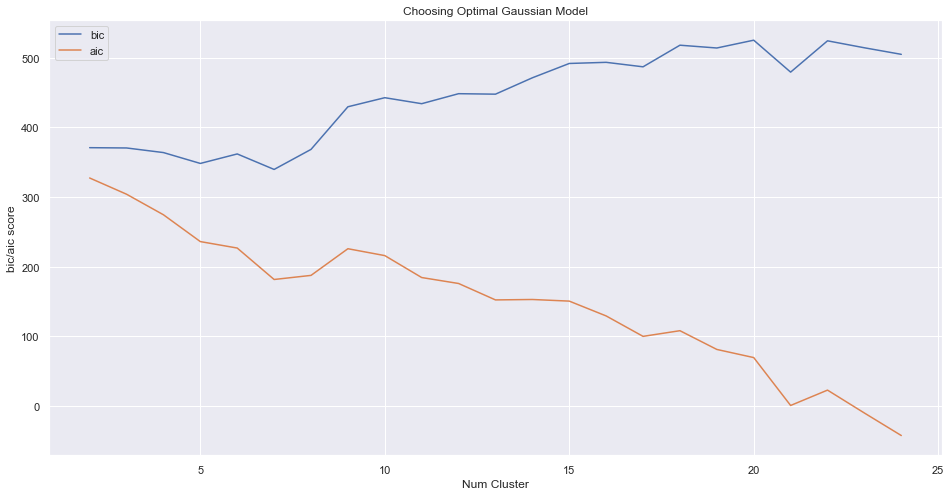

In [82]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [83]:
x = pd.DataFrame(burgers.iloc[:,1:4])

model = GaussianMixture(n_components=8, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
burgers['cluster'] = labels

burgers.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.802901,2.995732,2.636500,167151.0,16.5,14.0,20.0
1,4.344227,3.846513,4.569691,231114.5,77.5,98.0,47.0
2,2.393746,0.000000,1.386294,292761.5,11.0,4.0,0.0
3,3.332205,2.639057,3.526361,74532.0,28.0,34.0,14.0
4,3.555348,3.465736,3.871201,119022.0,35.0,48.0,32.0
5,1.445186,2.012676,0.804719,117361.5,4.5,3.0,7.5
6,2.564949,2.944439,2.397895,86808.0,13.0,11.0,19.0
7,3.349750,2.079442,3.569433,96875.0,28.5,35.5,8.0


In [84]:
g1_burgers = [0, 2, 5, 6] # healthy

g2_burgers = [1, 3, 4, 7] # moderately unhealthy

g3_burgers = [] # unhealthy

In [85]:
burgers['groups'] = 0
for i, r in burgers.iterrows():
    if r['cluster'] in g1_burgers:
        burgers.at[i,'groups'] = 1
    elif r['cluster'] in g2_burgers:
        burgers.at[i,'groups'] = 2
    elif r['cluster'] in g3_burgers:
        burgers.at[i,'groups'] = 3

### Salads - sugar and fat

In [86]:
salads = full_dataset[['category','log fat','log sugar','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sugar (PDV)']]
salads = salads[salads['category'] == 'salads']
salads.drop_duplicates(inplace=True)

In [87]:
x = pd.DataFrame(salads.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  12185.764192945308
aic Score:  12078.914995961588

cluster number:  3
bic score:  13093.388354025166
aic Score:  12930.30273757633

cluster number:  4
bic score:  11276.765634359743
aic Score:  11057.443598445792

cluster number:  5
bic score:  12839.94229441542
aic Score:  12564.383839036353

cluster number:  6
bic score:  11668.7183762345
aic Score:  11336.923501390316

cluster number:  7
bic score:  9307.793182313424
aic Score:  8919.761888004126

cluster number:  8
bic score:  10491.319594634546
aic Score:  10047.051880860132

cluster number:  9
bic score:  9249.750142326613
aic Score:  8749.246009087083

cluster number:  10
bic score:  10995.761189898823
aic Score:  10439.020637194179

cluster number:  11
bic score:  10573.252999457955
aic Score:  9960.276027288193

cluster number:  12
bic score:  9216.481635562212
aic Score:  8547.268243927334

cluster number:  13
bic score:  8570.667911582581
aic Score:  7845.218100482589

cluster number:  14
bic s

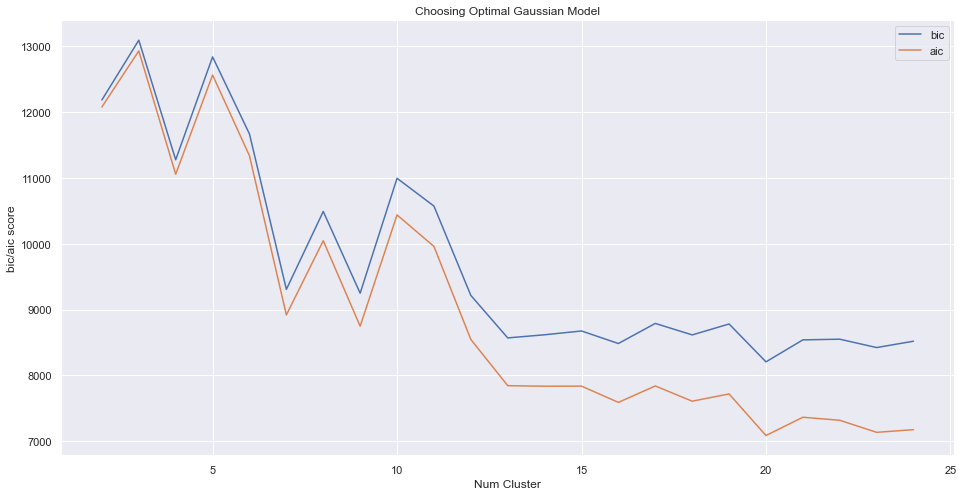

In [88]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [89]:
x = pd.DataFrame(salads.iloc[:,1:4])

model = GaussianMixture(n_components=21, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
salads['cluster'] = labels

salads.groupby('cluster').median()

,log fat,log sugar,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sugar (PDV)
cluster,,,,,,,
0,3.367296,4.143135,2.639057,203187.0,29.0,14.0,63.0
1,0.000000,3.871201,0.000000,164562.0,0.0,0.0,48.0
2,2.772589,1.791759,2.772589,162390.5,16.0,16.0,6.0
3,2.639057,4.276280,1.945910,168786.5,14.0,7.0,72.0
4,1.098612,3.218876,0.000000,148665.5,3.0,1.0,25.0
5,5.126931,2.484907,4.324111,144600.5,168.5,75.5,12.0
6,3.962398,3.979638,3.494668,157843.5,57.0,33.0,53.5
7,3.178054,2.772589,3.178054,168030.0,24.0,24.0,16.0
8,2.833213,2.302585,2.079442,173735.5,17.0,8.0,10.0


In [90]:
g1_salad = [2, 4, 7, 8, 10, 13, 16, 17, 20] # healthy

g2_salad = [0, 1, 3, 6, 14, 15, 18, 19] # moderately unhealthy

g3_salad = [5, 9, 11, 12] # unhealthy

In [91]:
salads['groups'] = 0
for i, r in salads.iterrows():
    if r['cluster'] in g1_salad:
        salads.at[i,'groups'] = 1
    elif r['cluster'] in g2_salad:
        salads.at[i,'groups'] = 2
    elif r['cluster'] in g3_salad:
        salads.at[i,'groups'] = 3

### Breads - fat and sodium

In [92]:
breads = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
breads = breads[breads['category'] == 'breads']
breads.drop_duplicates(inplace=True)

In [93]:
x = pd.DataFrame(breads.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  37855.78544438221
aic Score:  37730.80511777964

cluster number:  3
bic score:  37257.16103349044
aic Score:  37066.40158762336

cluster number:  4
bic score:  32342.4719613123
aic Score:  32085.933396180713

cluster number:  5
bic score:  32258.74651240194
aic Score:  31936.428828005843

cluster number:  6
bic score:  31670.69166943997
aic Score:  31282.594865779363

cluster number:  7
bic score:  31491.311364195506
aic Score:  31037.43544127039

cluster number:  8
bic score:  29308.6115801835
aic Score:  28788.956537993876

cluster number:  9
bic score:  29210.003970366182
aic Score:  28624.56980891205

cluster number:  10
bic score:  29119.55222574096
aic Score:  28468.33894502232

cluster number:  11
bic score:  28639.29455582542
aic Score:  27922.30215584227

cluster number:  12
bic score:  28840.45758180596
aic Score:  28057.6860625583

cluster number:  13
bic score:  28722.488331866414
aic Score:  27873.93769335424

cluster number:  14
bic score:  

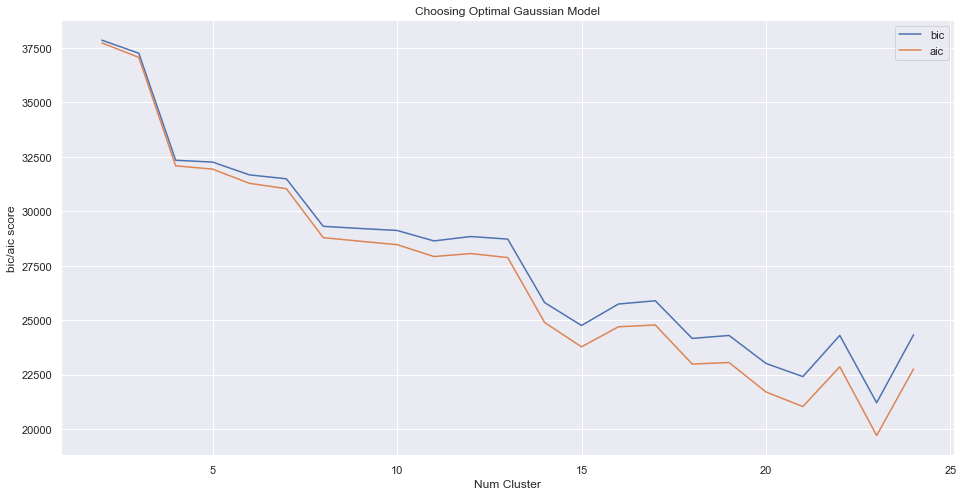

In [94]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [95]:
x = pd.DataFrame(breads.iloc[:,1:4])

model = GaussianMixture(n_components=24, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
breads['cluster'] = labels

breads.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,2.079442,2.079442,2.708050,138762.5,8.0,15.0,8.0
1,4.350091,4.695914,4.189655,83503.5,77.5,66.0,109.5
2,1.386294,2.197225,0.693147,143161.0,4.0,2.0,9.0
3,1.700599,0.000000,1.791759,142849.0,5.5,6.0,1.0
4,1.791759,2.197225,1.098612,143045.0,6.0,3.0,9.0
5,3.367296,3.178054,4.025352,149624.0,29.0,56.0,24.0
6,3.839394,3.526361,4.077537,116551.0,46.5,59.0,34.0
7,2.302585,2.197225,1.791759,143703.0,10.0,6.0,9.0
8,4.983607,4.828282,5.241747,92158.5,146.0,189.0,125.0


In [96]:
g1_bread = [0, 2, 3, 4, 7, 10, 11, 13, 18, 19, 20, 22, 23] # healthy

g2_bread = [5, 6, 9, 12, 14, 17] # moderately unhealthy

g3_bread = [1, 8, 15, 16, 21] # unhealthy

In [97]:
breads['groups'] = 0
for i, r in breads.iterrows():
    if r['cluster'] in g1_bread:
        breads.at[i,'groups'] = 1
    elif r['cluster'] in g2_bread:
        breads.at[i,'groups'] = 2
    elif r['cluster'] in g3_bread:
        breads.at[i,'groups'] = 3

## Classification

In [98]:
df_group = pd.DataFrame(beverages[['category','recipe_id','groups']])
df_group = df_group.append(desserts[['category','recipe_id','groups']])
df_group = df_group.append(vegetables[['category','recipe_id','groups']])
df_group = df_group.append(pasta[['category','recipe_id','groups']])
df_group = df_group.append(seafood[['category','recipe_id','groups']])
df_group = df_group.append(meat[['category','recipe_id','groups']])
df_group = df_group.append(soup[['category','recipe_id','groups']])
df_group = df_group.append(burgers[['category','recipe_id','groups']])
df_group = df_group.append(salads[['category','recipe_id','groups']])
df_group = df_group.append(breads[['category','recipe_id','groups']])

In [99]:
df_group

,category,recipe_id,groups
136,beverages,13267,3
154,beverages,13366,2
162,beverages,15292,2
248,beverages,16632,3
269,beverages,15438,1
...,...,...,...
121510,breads,312870,1
121534,breads,271705,1
121575,breads,388389,1
121589,breads,392542,1


In [100]:
# Combining health score to dataset
df_healthy = df_group.merge(full_dataset, how="inner", on="recipe_id")

In [101]:
df_healthy.drop('category_x', axis = 1, inplace=True)
df_healthy.rename(columns = {'category_y': 'category'}, inplace=True)
df_healthy

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,22015,2001-12-26,"I had never had Hot Buttered Rum before, but t...",5,we love keeping this on hand for the cold nigh...
1,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,27783,2002-11-14,"Delicious, warm and comforting! Very easy to ...",5,we love keeping this on hand for the cold nigh...
2,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,57222,2004-12-27,I actually made this recipe for the first time...,5,we love keeping this on hand for the cold nigh...
3,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,280166,2008-10-18,"This should be called ""Decadent Hot Buttered R...",5,we love keeping this on hand for the cold nigh...
4,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,601528,2008-12-31,Fabulous drink! I use quite a bit more than t...,5,we love keeping this on hand for the cold nigh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121663,312870,1,breads,basic carrot muffins,13,27,196.1,11.0,53.0,9.0,...,3.970292,2.197225,2.079442,1.609438,2.197225,936601,2009-10-01,Great muffins! DH didn't even realize he was ...,5,the original recipe is in the mostly muffins c...
121664,271705,1,breads,basic baking powder biscuits modified for sta...,6,25,206.3,12.0,17.0,14.0,...,2.833213,2.639057,2.079442,3.218876,2.197225,171790,2009-10-01,We relly liked these biscuits. The butter impa...,5,"these biscuits are light inside, slightly cris..."
121665,388389,1,breads,singin hinnies northumbrian tea time griddl...,9,40,574.8,42.0,83.0,11.0,...,4.418841,2.397895,2.708050,4.219508,3.218876,353579,2009-10-01,These were a big hit at dinner last night. Ea...,5,"served warm and oozing with butter, these fabu..."
121666,392542,1,breads,bohemian kolaches with four fillings,21,140,122.4,3.0,26.0,3.0,...,3.258097,1.098612,1.791759,1.386294,1.945910,1366254,2009-10-01,This is great for catered events!,3,received this in an email - it is a big recipe...


In [102]:
# sort dataset by date
df_healthy.sort_values(by='date', inplace=True)

In [103]:
df_healthy

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
29679,9014,1,vegetables,cheesy potato skillet stuff,5,40,357.8,33.0,6.0,22.0,...,1.791759,3.091042,3.401197,3.610918,2.079442,11297,2001-06-18,What a great quick & easy meal especially for ...,4,this recipe came about when a friend of mine r...
77264,9492,2,meat,chicken honey glazed,7,100,484.9,11.0,189.0,20.0,...,5.241747,2.995732,4.700480,1.791759,2.772589,11297,2001-06-26,So easy and tasty. To make the clean-up even...,4,serve with a green salad and a your favorite r...
77265,2731,1,meat,jaegerschnitzel,17,35,382.2,28.0,16.0,17.0,...,2.772589,2.833213,4.110874,3.526361,1.609438,11297,2001-07-02,The man of the house really loved the sauce wi...,4,(breaded veal cutlet with mushroom sauce)
57036,10104,2,pasta,broccoli pork,12,30,150.3,8.0,19.0,26.0,...,2.944439,3.258097,3.401197,1.791759,1.098612,11297,2001-07-16,Really great. Sometimes I also add some thinly...,4,"this is my favorite marinade for pork, orienta..."
77266,5478,1,meat,easy garlic chicken,5,30,221.3,9.0,53.0,5.0,...,3.970292,1.609438,3.912023,1.609438,1.386294,11297,2001-07-17,Easy and tasty. Even easier clean-up by lini...,4,"a quick, easy chicken recipe for days when you..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102148,392644,2,meat,crunchy chicken pieces,7,110,577.6,40.0,3.0,25.0,...,1.098612,3.218876,4.736198,3.526361,2.079442,1366254,2009-10-02,Great texture and bite,4,delicious pieces of chicken coated in crunchy ...
102149,385432,2,meat,the realtor s round steak rose,14,105,660.8,59.0,26.0,38.0,...,3.258097,3.637586,4.510860,3.784190,1.945910,1058097,2009-10-02,"Instead of adding the mushrooms at the end, I ...",5,this is a nice way to serve round steak. the ...
102150,304326,2,meat,pork chops parmesan,8,65,442.6,42.0,10.0,40.0,...,2.302585,3.688879,4.174387,4.174387,1.609438,14410,2009-10-02,"Good flavour, very tender. One caution...while...",5,this is very good. i recieved this recipe fro...
89212,109807,2,meat,feta bacon scrambled eggs for 1,8,10,337.5,40.0,9.0,24.0,...,2.197225,3.178054,3.637586,4.158883,0.693147,780172,2009-10-02,Made these for my breakfast and they were fabu...,5,i just made this for my brunch.


In [104]:
df_healthy.to_csv('./Dataset/train_healthy.csv', index=False)